## Click it !

This is the story of you wanting to make money (you greedy bastard!). So you have an idea: set up a simple website on a fashionable subject (let's say [unicorns pooping](http://www.warpedspeed.com/meet-the-unicorn-that-will-change-the-way-you-poo/?utm_content=inf_10_1185_2&ts_pid=2)) and put an ad on it. Then everytime one of your visitors clicks on the ad you get a dollar. So to get an idea of how much money you will make you need to:

* know how many visitors you will get during some period of time (a month for example),
* know the proportion of visitors who will click on the ad.

The first point depends solely on the topic of your website (and with such a hot topic as ours you are doomed to succeed), but the second depends solely on the ad. How to get an idea of the quality of an ad? 

Since we are only interested in making money, a natural way to measure it would be to measure how many people clicked on a given ad compared to how many people were showed the ad in total. This ratio goes by the beautiful name of Click Through Rate (CTR):

$$ \text{CTR} = \frac{\text{# People who click on the ad}}{\text{# People who saw the ad}} $$

Read # as "Number of".

The important thing to realize at this point is that the CTR is a **random** quantity. Indeed consider the following thought experiment: we setup $K$ copies (same content, same ad) of our website during a month, and each of those sites receives the same number of visitors. Then if at the end of the month we measure the CTR on each of those sites, we will get different values. To modelize this intrinsic randomness we need the notion of a Bernoulli random variable. 

A Bernoulli random variable $X$, with distribution $\mathit{B}(\theta)$, takes the value 1 with probability $\theta$ and the value 0 with probability $1 - \theta$. Usually the value 1 is interpreted as a success and 0 as a failure.

When a visitor clicks on an ad we succeed, while when he does not we fail. So the behaviour of a visitor is well modelized by some Bernoulli random variable with a probability of success $\theta$ (we make the strong hypothesis that $\theta$ is the same for all visitors and so depends solely on the ad). The question now is: how to guess $\theta$? What is the relation of the CTR to this value $\theta$?

To guess the value of $\theta$ we could imagine using only the characteristics of the ad (its colour, what it sells and so on), but we will settle for a much simpler strategy: run your website for a month, and record for each visitor, $X_i$, if he clicked ($X_i = 1$) or not ($X_i = 0$) on the ad. After a month we know how many visitors where shown the ad (say $N$) and if they clicked on it or not. Then we can compute the CTR as:

$$CTR = \frac{1}{N} \sum_{i = 1}^{N} X_i.$$

We can rephrase this computation (in a pretty pedantic way) by saying that the CTR is the empirical mean of independent observations (yes I just slipped in an idenpendent hypothesis, but it seems reasonable, furthermore it's my blog I do whatever I want) $\, X_1, \dots, X_N$ of a Bernoulli random variable $X \sim \mathit{B}(\theta)$. This framework allows us to simulate our preceding thought experiment, to illustrate the randomness of the CTR.

In [1]:
import numpy as np
np.random.seed(123)

K = 100 # number of copies of our website
N = 1000 # number of visitors on each copy
theta = 0.2 # true parameter of the Bernoulli distribution

visitation_matrix = np.random.choice([0, 1], size=(N, K), p=[1-theta, theta]) # Each column represents a copy of the site
CTR_results = np.mean(visitation_matrix, axis=0)
print(CTR_results)

[ 0.181  0.208  0.193  0.181  0.204  0.203  0.172  0.203  0.199  0.201
  0.202  0.208  0.211  0.196  0.19   0.192  0.208  0.185  0.212  0.2    0.202
  0.195  0.222  0.191  0.19   0.201  0.186  0.193  0.224  0.198  0.173
  0.213  0.193  0.212  0.22   0.212  0.177  0.19   0.182  0.198  0.209
  0.192  0.215  0.22   0.2    0.219  0.2    0.187  0.2    0.195  0.202
  0.21   0.21   0.181  0.204  0.217  0.203  0.187  0.198  0.191  0.2    0.204
  0.202  0.187  0.22   0.215  0.184  0.194  0.19   0.214  0.195  0.2    0.204
  0.189  0.179  0.198  0.233  0.186  0.222  0.219  0.192  0.192  0.198
  0.186  0.208  0.193  0.182  0.228  0.211  0.197  0.201  0.192  0.195
  0.201  0.194  0.183  0.198  0.189  0.198  0.192]


We can see that the CTR on each copy may differ, even if the parameter $\theta$ is kept the same. To visualize this result we may for example plot the histogram of the values taken by the CTR.

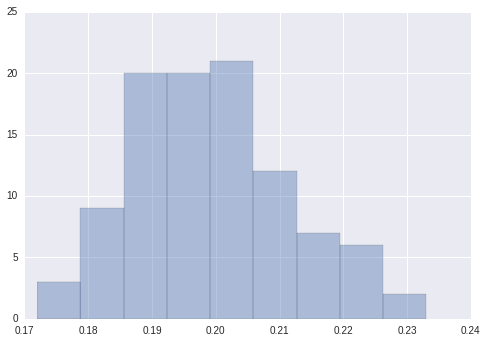

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb

sb.distplot(CTR_results, kde=False)

We see that the CTR is indeed random, as a result of our modelization (but in accordance to our intuition), and spreads around the **true** parameter $\theta = 0.2$. So the CTR is an **approximation** of the parameter $\theta$, in statistics we rather speak of an **estimator** of $\theta$, and to guess $\theta$ our best bet may be to compute the CTR.

Statistical theory provides many justifications of this claim (the simplest in that case would be the moment method), one of them being particularly central to the theory: the maximum likelihood approach. We will now quickly introduce this methodology, which will imply the use of the CTR as an estimator of $\theta$, and which will serve as a basis for further discussions.

## The most likely $\theta$

The maximum likelihood approach can be traced back at least to [Fisher](https://en.wikipedia.org/wiki/Ronald_Fisher), the father of modern statistics. In our case the idea is particularly simple: suppose that we have observed $N$ visitors, and recorded for each of them if they clicked or not. We say that we have observed a realization $X_1 = x_1, \dots, X_N = x_N$, where $x_i = 1$ if the ith visitor clicked on the ad, $0$ if not, of the Bernoulli random variables $X_i$. So what is the probability of such a realization?

Since we make the hypothesis that the different observations are independent, it is pretty straightforward to compute this probability:
$$\mathbb{P}_\theta (X_1 = x_1, \dots, X_N = x_N) = \prod_{i=1}^{i=N} \, \theta^{x_i} \, (1 - \theta)^{1 - x_i}.$$

Here we write $\mathbb{P}_\theta$ to mean that the probability is computed in the case where the **true** parameter is $\theta$.

In fact we can rewrite this in a much simpler way:
$$\mathbb{P}_\theta (X_1 = x_1, \dots, X_N = x_N) = \, \theta^{\text{# of successes}} \, (1 - \theta)^{\text{# of failures}}.$$

Ok now pause for a moment. Of course this probability depends on the actual observations $x_i$, but it depends also on the parameter $\theta$. In fact we could view it as a function of $\theta$. This function is called the likelihood function:
$$\mathcal{L} (\theta \, | \, X_1 = x_1, \dots, X_N = x_N) = \prod_{i=1}^{i=N} \, \theta^{x_i} \, (1 - \theta)^{1 - x_i}.$$

The idea of Fisher is then simple, we should chose the parameter $\theta$ such that the probability of observing the particular sequence $X_1 = x_1, \dots, X_N = x_N$ is maximal, i.e. the parameter $\theta$ for which $\mathcal{L} (\theta \, | \, X_1 = x_1, \dots, X_N = x_N)$ is maximal. Maximum likelihood estimation is nothing more!

To illustrate the whole thing let us draw the graph of the likelihood function for a particular realization of $X_1, \dots, X_N$.

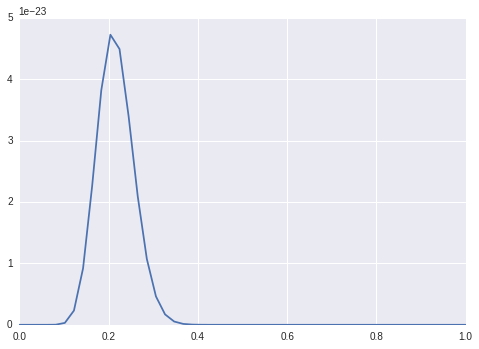

In [3]:
N = 100 # number of visitors
theta = 0.2 # true Bernoulli parameter

def likelihood():
    realization_vector = np.random.choice([0, 1], size=N, p=[1 - theta, theta])
    nb_success = np.sum(realization_vector)
    nb_failure = N - nb_success
    theta_grid = np.linspace(0, 1, 50)
    prob_theta = (theta_grid ** nb_success) * ((1 - theta_grid) ** nb_failure)
    plt.plot(theta_grid, prob_theta)
    
likelihood()

Ok we see that for that particular realization the maximum likelihood estimation of $\theta$ would be close to its true value 0.2. In fact it is easy to obtain a close analitycal form of this particular maximum likelihood estimator (MLE from now on). It is in fact often easier to work with the logarithm of the likelihood (independance of observations implies likelihoods with a product form, and the logarithm turns products into sums) and to obey the rule of optimization people we will rather talk of minimization (that is totally arbitrary), so that we will try to minimize the negative log-likelihood:
$$\mathcal{l} (\theta \, | \, X_1 = x_1, \dots, X_N = x_N) = - \big\{ \sum_{i = 1}^{N} x_i \log(\theta) + (1 - x_i) \log(1 - \theta) \big\}.$$

To minimize this expression we solve:

$$ \frac{\partial \mathcal{l}}{\partial \theta} = 0,$$

and check that we get indeed a minimum (by computing the second partial derivative).

Proceeding in this manner we deduce the MLE $\hat{\theta}_{\text{MLE}}$:
$$\hat{\theta}_{\text{MLE}} = \frac{1}{N} \sum_{i = 1}^{N} X_i.$$

That's the CTR! It's one way to justify that the CTR is a good estimator of $\theta$: we showed in fact that the CTR is the MLE of $\theta$.

There is a large body of litterature which proves that the MLE has a lot of good large sample (i.e. when $N$ grows to infinity) properties and we can do many things in this particular case (testing, confidence intervals, etc...). 

In a next post we will make the problem harder and introduce the Expectation Maximization algorithm.